In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import pyplot as plt
import math
from IPython.display import clear_output
from sklearn.preprocessing import StandardScaler
import time
import datetime as dt
import matplotlib.dates as mdates
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
import joblib

import xlrd
import csv
from pandas import ExcelWriter
from pandas import ExcelFile


import utils


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
input_data = './MSc Student Data 2021/data/v2/aluminium/aluminium_22_features.xlsx'
target_data = 'MSc Student Data 2021/data/v2/aluminium/aluminium_22_target_lagged_log_returns.csv'

#input_data = './MSc Student Data 2021/data/v2/copper/copper_22_features.xlsx'
#target_data = 'MSc Student Data 2021/data/v2/copper/copper_22_target_lagged_log_returns.csv'

In [3]:
input_df = pd.read_excel(input_data)
target_df = pd.read_csv(target_data)

In [4]:
input_df = input_df.rename(columns = {'Unnamed: 0': 'date'}, inplace = False)

In [5]:
input_df = input_df.iloc[3: , :]

In [6]:
input_df.shape

(4187, 56)

In [7]:
target_df.shape

(4187, 2)

In [8]:
input_df['y'] = target_df['y'].values

In [9]:
input_df.columns

Index(['date', 'FeatureFamily.COT', 'FeatureFamily.COT.1', 'FeatureFamily.CTA',
       'FeatureFamily.CTA.1', 'FeatureFamily.CURVE', 'FeatureFamily.CURVE.1',
       'FeatureFamily.CURVE.2', 'FeatureFamily.CURRENCY',
       'FeatureFamily.CURRENCY.1', 'FeatureFamily.CURRENCY.2',
       'FeatureFamily.CURRENCY.3', 'FeatureFamily.CURRENCY.4',
       'FeatureFamily.CURRENCY.5', 'FeatureFamily.CURRENCY.6',
       'FeatureFamily.CURRENCY.7', 'FeatureFamily.CURRENCY.8',
       'FeatureFamily.CURRENCY.9', 'FeatureFamily.FREIGHT',
       'FeatureFamily.FREIGHT.1', 'FeatureFamily.FREIGHT.2',
       'FeatureFamily.FREIGHT.3', 'FeatureFamily.FREIGHT.4',
       'FeatureFamily.FREIGHT.5', 'FeatureFamily.FREIGHT.6',
       'FeatureFamily.FREIGHT.7', 'FeatureFamily.FREIGHT.8',
       'FeatureFamily.FREIGHT.9', 'FeatureFamily.INVENTORIES',
       'FeatureFamily.INVENTORIES.1', 'FeatureFamily.INVENTORIES.2',
       'FeatureFamily.INVENTORIES.3', 'FeatureFamily.INVENTORIES.4',
       'FeatureFamily.INVEN

In [10]:
## collect the features with more than 2000 instances
ambudant_features = []
amdudant_features_indexes = []
index = 0
for col_name in input_df.columns:
    number = input_df[col_name].isnull().sum()
    print(col_name + " " + str(number) + " Nan values")
    if(number < 500):
        ambudant_features.append(col_name)
        amdudant_features_indexes.append(index)
    index += 1

date 0 Nan values
FeatureFamily.COT 2723 Nan values
FeatureFamily.COT.1 3326 Nan values
FeatureFamily.CTA 63 Nan values
FeatureFamily.CTA.1 32 Nan values
FeatureFamily.CURVE 0 Nan values
FeatureFamily.CURVE.1 348 Nan values
FeatureFamily.CURVE.2 348 Nan values
FeatureFamily.CURRENCY 349 Nan values
FeatureFamily.CURRENCY.1 349 Nan values
FeatureFamily.CURRENCY.2 349 Nan values
FeatureFamily.CURRENCY.3 349 Nan values
FeatureFamily.CURRENCY.4 349 Nan values
FeatureFamily.CURRENCY.5 349 Nan values
FeatureFamily.CURRENCY.6 349 Nan values
FeatureFamily.CURRENCY.7 349 Nan values
FeatureFamily.CURRENCY.8 349 Nan values
FeatureFamily.CURRENCY.9 349 Nan values
FeatureFamily.FREIGHT 2537 Nan values
FeatureFamily.FREIGHT.1 2537 Nan values
FeatureFamily.FREIGHT.2 2537 Nan values
FeatureFamily.FREIGHT.3 2537 Nan values
FeatureFamily.FREIGHT.4 2537 Nan values
FeatureFamily.FREIGHT.5 2537 Nan values
FeatureFamily.FREIGHT.6 2537 Nan values
FeatureFamily.FREIGHT.7 2537 Nan values
FeatureFamily.FREIGHT.8

In [11]:
amdudant_features_indexes

[0,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 55,
 56]

In [12]:
ambudant_features

['date',
 'FeatureFamily.CTA',
 'FeatureFamily.CTA.1',
 'FeatureFamily.CURVE',
 'FeatureFamily.CURVE.1',
 'FeatureFamily.CURVE.2',
 'FeatureFamily.CURRENCY',
 'FeatureFamily.CURRENCY.1',
 'FeatureFamily.CURRENCY.2',
 'FeatureFamily.CURRENCY.3',
 'FeatureFamily.CURRENCY.4',
 'FeatureFamily.CURRENCY.5',
 'FeatureFamily.CURRENCY.6',
 'FeatureFamily.CURRENCY.7',
 'FeatureFamily.CURRENCY.8',
 'FeatureFamily.CURRENCY.9',
 'FeatureFamily.SATELLITE',
 'FeatureFamily.SATELLITE.1',
 'FeatureFamily.SATELLITE.2',
 'FeatureFamily.SATELLITE.3',
 'FeatureFamily.SATELLITE.4',
 'FeatureFamily.SATELLITE.5',
 'FeatureFamily.SATELLITE.6',
 'FeatureFamily.SATELLITE.7',
 'FeatureFamily.SATELLITE.8',
 'FeatureFamily.SATELLITE.9',
 'FeatureFamily.SATELLITE.10',
 'FeatureFamily.SEASONALITY',
 'FeatureFamily.TECHNICAL',
 'y']

In [13]:
#input_df = input_df.dropna()

In [14]:
input_df = input_df.dropna(subset=ambudant_features)

In [15]:
def normalize(df):
    result = df.copy()
    for i,feature_name in enumerate(df.columns):
        if(i!=0):
            mean_value = df[feature_name].mean()
            std = df[feature_name].std()
            result[feature_name] = (df[feature_name] - mean_value) / (std)
        return result

In [16]:
input_df = normalize(input_df)

In [17]:
input_df['FeatureFamily.CURRENCY.5'].mean()

-0.00469882807311695

In [18]:
input_df

,date,FeatureFamily.COT,FeatureFamily.COT.1,FeatureFamily.CTA,FeatureFamily.CTA.1,FeatureFamily.CURVE,FeatureFamily.CURVE.1,FeatureFamily.CURVE.2,FeatureFamily.CURRENCY,FeatureFamily.CURRENCY.1,...,FeatureFamily.MACRO.1,FeatureFamily.MACRO.2,FeatureFamily.MACRO.3,FeatureFamily.MACRO.4,FeatureFamily.MACRO.5,FeatureFamily.MACRO.6,FeatureFamily.MACRO.7,FeatureFamily.MACRO.8,FeatureFamily.TECHNICAL,y
352,2006-08-30 00:00:00,NaN,NaN,0.783177,0.062513,-0.647852,-5.115819,5.181058,-0.316221,-0.272158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.083741,0.044768
353,2006-08-31 00:00:00,NaN,NaN,0.810548,0.156671,-0.659636,-5.066796,5.193303,0.025616,-0.311132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.986369,0.027742
354,2006-09-01 00:00:00,NaN,NaN,0.816633,0.165796,-0.672428,-5.055683,5.40935,-0.224412,-0.447944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.045859,0.034136
355,2006-09-04 00:00:00,NaN,NaN,0.818147,0.161189,-0.686043,-5.063133,5.765975,-0.383604,-0.233346,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.055632,-0.001535
356,2006-09-05 00:00:00,NaN,NaN,0.921575,0.424266,-0.699731,-5.016574,6.056988,-0.195961,-0.291979,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.694914,-0.005060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4185,2021-05-10 00:00:00,-1.141022,0.999853,1.460542,1.330509,0.348604,1.987793,1.558843,-0.382762,-0.029803,...,0.062821,-1.59183,1.456286,0.674601,1.997921,1.389776,-0.869097,-0.252418,2.307379,-0.019463
4186,2021-05-11 00:00:00,-1.142959,0.984702,1.453966,1.333379,0.347817,1.995444,1.553612,-0.386787,-0.028482,...,0.196926,-1.409277,2.290697,1.169359,1.856215,1.089062,-0.535756,-0.067858,2.174891,-0.005795
4187,2021-05-12 00:00:00,-1.144863,0.969741,1.45781,1.355394,0.349703,2.003963,1.547617,-0.283898,-0.025516,...,0.081405,-0.87749,2.914608,2.21683,1.631053,1.161719,-0.730524,-0.267517,1.942721,0.000580
4188,2021-05-13 00:00:00,-1.146734,0.954968,1.468199,1.331541,0.353848,2.013286,1.543232,-0.276504,-0.024817,...,-0.351799,-1.050876,3.233204,1.888402,1.233569,1.492586,-0.742348,0.191163,1.769301,0.029313


In [19]:
features = []
for feature in ambudant_features:
    features.append(input_df[feature].values)

In [20]:
filtered_dates = np.array(features[0])
filtered_targets = np.array(features[-1])

In [21]:
features = features[1:-1]

In [22]:
features = np.array(features).transpose()

In [23]:
features.shape

(3838, 28)

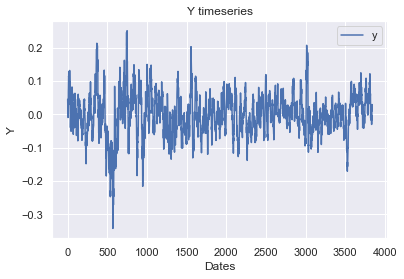

In [24]:
y = filtered_targets
index = [i+1 for i in range(len(filtered_targets))]

plt.plot(index, y ,label = "y")
plt.xlabel('Dates')
plt.ylabel('Y')
plt.title('Y timeseries')
plt.legend()
plt.show()
print()

In [25]:
inp,lbl,dates = utils.split_timeseries(5,22-2,features,filtered_targets,filtered_dates)

In [26]:
print(inp.shape)
print(lbl.shape)

(3813, 5, 28)
(3813,)


In [27]:
joblib.dump(inp, '../Vectors/h_aluminium_vectors')
joblib.dump(lbl, '../Vectors/h_aluminium_labels')
joblib.dump(dates, '../Vectors/h_aluminium_dates')

'''joblib.dump(inp, '../Vectors/h_copper_vectors')
joblib.dump(lbl, '../Vectors/h_copper_labels')
joblib.dump(dates, '../Vectors/h_copper_dates')'''

"joblib.dump(inp, '../Vectors/h_copper_vectors')\njoblib.dump(lbl, '../Vectors/h_copper_labels')\njoblib.dump(dates, '../Vectors/h_copper_dates')"